In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader.data as pdr
import numpy as np
end='2016/9/30'
lnn225 = np.log(pdr.DataReader('NIKKEI225', 'fred', '1949/5/16', end)).dropna()
print(sm.tsa.adfuller(lnn225.NIKKEI225, regression='nc')[0])
print(sm.tsa.adfuller(lnn225.NIKKEI225, regression='nc')[1])
print(sm.tsa.adfuller(lnn225.NIKKEI225, regression='nc')[2])
print(sm.tsa.adfuller(lnn225.NIKKEI225, regression='nc')[3])
print(sm.tsa.adfuller(lnn225.NIKKEI225, regression='nc')[4])

2.17369686757
0.994169731135
38
16730
{'1%': -2.5658736531258919, '5%': -1.9410160670068219, '10%': -1.6168041340187047}


In [5]:
z = lnn225
y = z.diff().dropna()
x = z.shift(1).dropna()
model = sm.OLS(y,x)
results = model.fit()
print('without drift ', results.params[0])
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print('with drift ', results.params[0], results.params[1])
x['t'] = range(len(y))
model = sm.OLS(y, x)
results = model.fit()
print('with drift + time trend ', results.params[0], results.params[1], results.params[2])

without drift  2.64035301275e-05
with drift  0.00159089854801 -0.000156562803399
with drift + time trend  0.00155046216659 -0.000149176839762 -2.60661370915e-09


In [9]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              NIKKEI225   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.962
Date:                Tue, 24 Oct 2017   Prob (F-statistic):             0.0517
Time:                        21:40:35   Log-Likelihood:                 49854.
No. Observations:               16768   AIC:                        -9.970e+04
Df Residuals:                   16765   BIC:                        -9.968e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.001      1.869      0.062   -7.56e-05       0.003
NIKKEI225     -0.0001      0.000     -1.145      0.252      -0.000       0.000
t          -2.607e-09      4e-08     -0.065      0.948    -8.1e-08    7.57e-08
==============================================================================
Omnibus:                     3202.752   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67165.592
Skew:                          -0.347   Prob(JB):                         0.00
Kurtosis:                      12.780   Cond. No.                     8.50e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

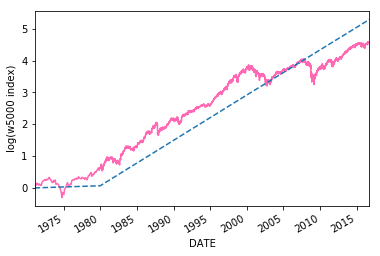

In [10]:
lnw5000 = np.log(pdr.DataReader('WILL5000INDFC', 'fred', '1949/5/16', end)).dropna()
lnw5000.columns=['Close']
plt.plot(lnw5000.Close, color='hotpink')
lnw5000['t']=range(len(lnw5000))
model=sm.OLS(lnw5000.Close,lnw5000.t)
results=model.fit()
results.fittedvalues.plot(label='prediction',style='--')
plt.ylabel('log(w5000 index)')

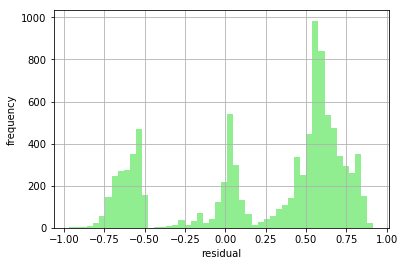

In [11]:
results.resid.hist(bins=50, color='lightgreen')
plt.ylabel('frequency')
plt.xlabel('residual')